## Alignment Comparison (Explicit vs Implicit)

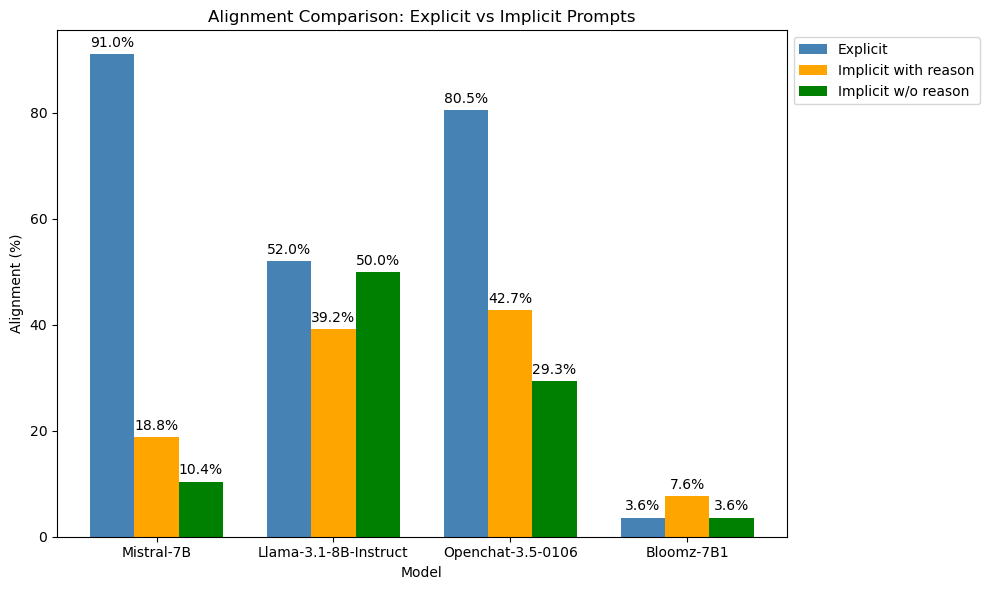

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Model alignment data TODO: Update as needed!
data = {
    "Model": ["Mistral-7B","Llama-3.1-8B-Instruct","Openchat-3.5-0106", "Bloomz-7B1", "Qwen2.5-7B-Instruct-1M"],
    "Explicit": [91.0, 52, 80.5, 3.6, 99.0],       # Explicit dataset correctness rate (%)
    "Implicit with reason": [18.8, 39.2, 42.7, 7.6, 0.0],      # Implicit dataset Prompt with reason correctness rate (%)
    "Implicit w/o reason": [10.4, 50, 29.3, 3.6, 1.6]        # Implicit dataset Prompt w/o reason correctness rate (%)
}

df = pd.DataFrame(data)

x = np.arange(len(df['Model']))  # the label locations
width = 0.25  # the width of the bars

fig_width = max(6, len(df['Model']) * 2.5)  # scale width based on number of models
fig, ax = plt.subplots(figsize=(fig_width, 6))

bars_explicit = ax.bar(x - width, df['Explicit'], width, label='Explicit', color='steelblue')
bars_implicit_a = ax.bar(x, df['Implicit with reason'], width, label='Implicit with reason', color='orange')
bars_implicit_b = ax.bar(x + width, df['Implicit w/o reason'], width, label='Implicit w/o reason', color='green')

# Labels, title and legend
ax.set_xlabel('Model')
ax.set_ylabel('Alignment (%)')
ax.set_title('Alignment Comparison: Explicit vs Implicit Prompts')
ax.set_xticks(x)
ax.set_xticklabels(df['Model'])
ax.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

# Add value labels on top of each bar
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars_explicit)
add_labels(bars_implicit_a)
add_labels(bars_implicit_b)

plt.tight_layout()
plt.show()


## Prompt Sensitivity bar chart for Implicit Dataset

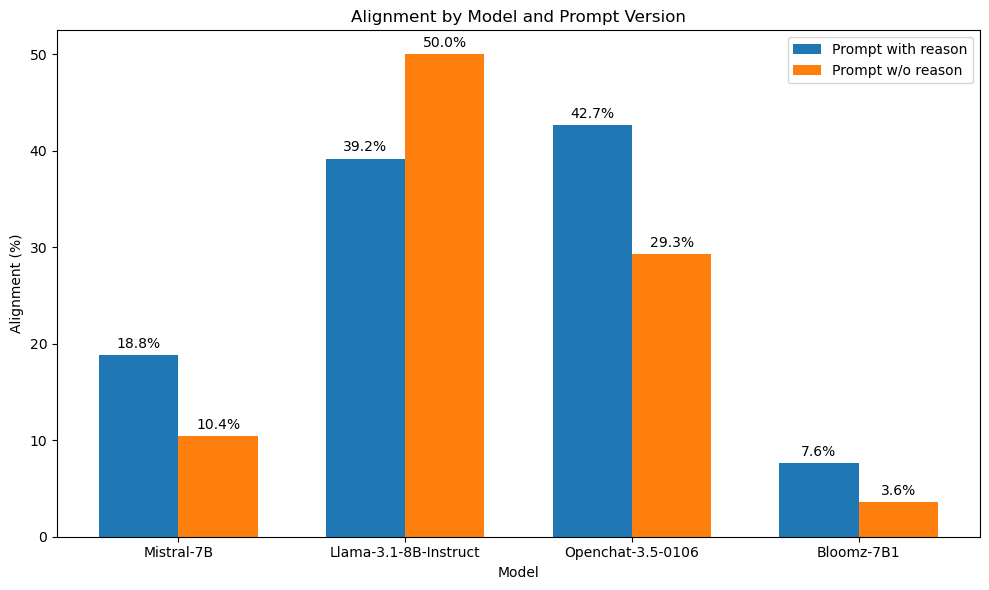

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Model alignment data TODO: Update as needed!
data = {
    "Model": ["Mistral-7B", "Llama-3.1-8B-Instruct", "Openchat-3.5-0106", "Bloomz-7B1"],
    "Prompt with reason": [18.8, 39.2, 42.7, 7.6],
    "Prompt w/o reason": [10.4, 50, 29.3, 3.6]
}

df = pd.DataFrame(data)

# Setup for side-by-side bars
x = np.arange(len(df['Model']))  # label locations
width = 0.35  # bar width

fig_width = max(6, len(df['Model']) * 2.5)  # scale width based on number of models
fig, ax = plt.subplots(figsize=(fig_width, 6))

bars_a = ax.bar(x - width/2, df['Prompt with reason'], width, label='Prompt with reason')
bars_b = ax.bar(x + width/2, df['Prompt w/o reason'], width, label='Prompt w/o reason')

# Labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Alignment (%)')
ax.set_title('Alignment by Model and Prompt Version')
ax.set_xticks(x)
ax.set_xticklabels(df['Model'])
ax.legend()

# Add value labels on bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars_a)
add_labels(bars_b)

plt.tight_layout()
plt.show()
